----
# Laboratorium 5 - Wpływ położenia biegunów na odpowiedź impulsową w układzie RLC II rzędu
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
# 0. Zagadnienia do opanowania przed zajęciami
----
- odpowiedź impulsowa 

- miejsca zerowe wielomianu

- bieguny transmitancji

- transformacja Laplace'a i odwrotna transformacja Laplace'a (metoda residuów) 

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import sympy
poles_figsize  =(8, 8)
default_figsize=(14, 8)

----
# 1. Wyznaczanie transmitancji operatorowej układu RLC oraz wyznaczanie biegunów transmitancji
----
## 1.1 Zadanie: Wyznacz transmitancję operatorową dla następującego układu I rzędu:


Dla poniższej transmitancji układu RC I rzędu zastosowano bibliotekę Sympy wyznaczającą symbolicznie transmitancję operatorową. 



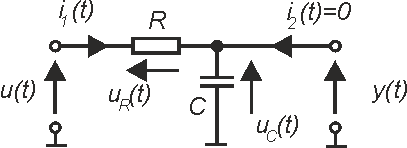
                         
                         
                         

In [2]:
#declare symbolic variable s (complex), R,L,C 
s = sympy.Symbol('s', real = 'False', nonzero = 'True')
R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
C = sympy.Symbol('C', real = 'True' , nonzero = 'True')

H1 = (1/(s*C)) / (R+(1/(s*C))) #dzielnik napięcia
display(sympy.simplify(H1))

1/(C*R*s + 1)

----
## 1.2 Dla wyznaczonego mianownika transmitancji wyznacz bieguny

W tym celu zdefiniuj wektor złożony ze współczynników przy każdej zmiennej s do stopnia danego wielomianu. Wykorzystaj funkcję `np.poly1d` oraz `np.roots`.
Uwaga, jeśli dla układu definiujemy transmitancję jako współczynniki licznika i mianownika (num, den), to współczynniki powinny być podane w kolejności malejącego wykładnika (np. s^2 + 3s + 5 byłyby reprezentowane jako [1, 3, 5]). W miejsce R i C podstaw wartości jednostkowe. 
Przedstaw położenie biegunów na płąszczyźnie zespolonej krzyżykami.


In [3]:
B1 = np.poly1d([   1])
A1 = np.poly1d([1, 1])
poles1 = np.roots(A1)
print("bieguny = " + str(poles1))

bieguny = [-1.]


C:\Users\Jan\AppData\Local\Temp\ipykernel_4664\4039266710.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


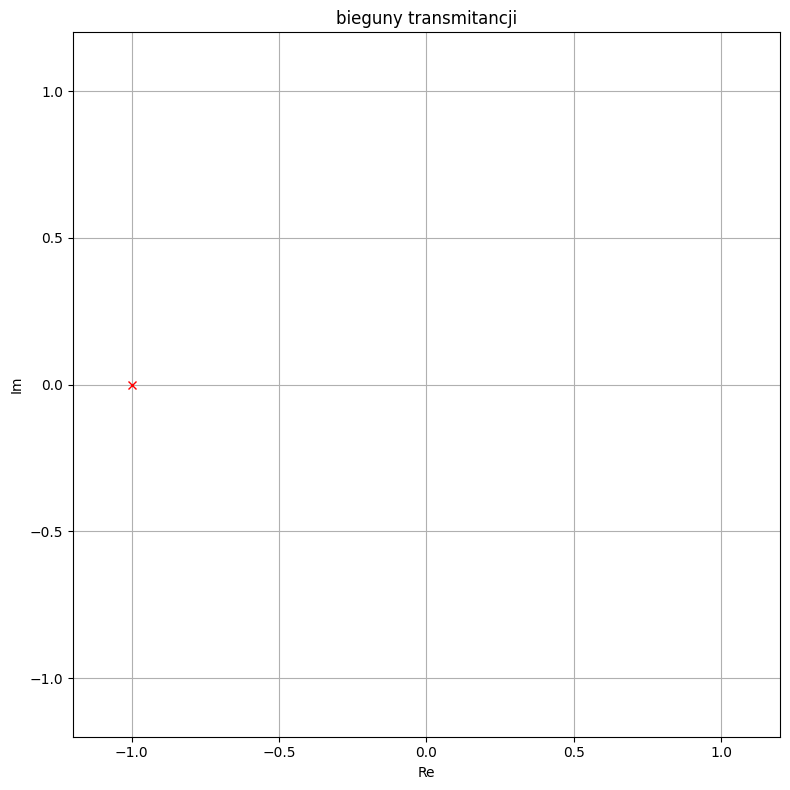

In [4]:
fig, ax = plt.subplots(1, 1, figsize=poles_figsize)
ax.plot(poles1.real, poles1.imag,'rx')
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.grid()
fig.tight_layout()
fig.show()

----
## 1.3 Dla układu II rzędu przedstawionego poniżej wyznacz transmitancję operatorową i wyznacz położenie biegunów. 
Dokonaj uproszczenia z wykorzystaniem funkcji `sympy.cancel`. Zwróć uwagę na różnicę między zastosowaniem funkcji `sympy.symplify` a `sympy.cancel` 

<br>
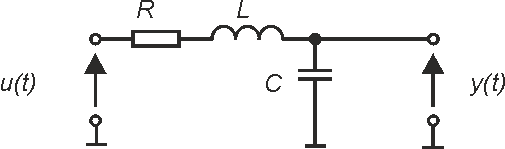



In [5]:
#declare symbolic variable s (complex), R,L,C
s = sympy.Symbol('s', real = 'False', nonzero = 'True')
R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
C = sympy.Symbol('C', real = 'True' , nonzero = 'True')
L = sympy.Symbol('L', real = 'True' , nonzero = 'True')

H2 = (1/(s*C))/(R+(s*L)+(1/(s*C)))
display(sympy.simplify(H2))

1/(C*s*(L*s + R) + 1)

In [6]:
C=1
L=1
R=1

#calculate poles
B1 = np.poly1d([1])
A1 = np.poly1d([L*C, R*C, 1])

poles2 = np.roots(A1)
print("bieguny = " + str(poles2))

bieguny = [-0.5+0.8660254j -0.5-0.8660254j]


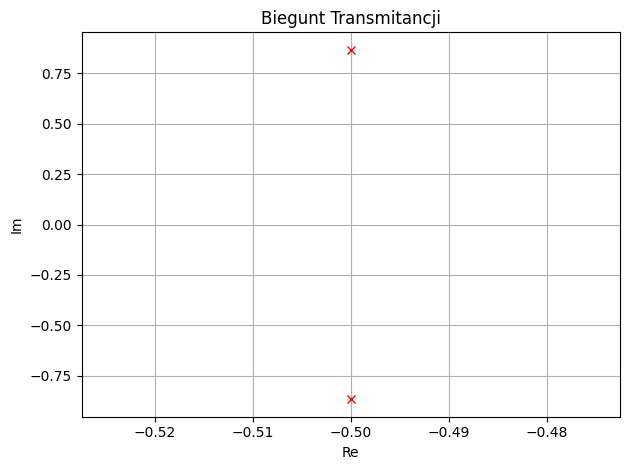

In [7]:
#plot poles
plt.plot(np.real(poles2), np.imag(poles2), "rx")
plt.title("Biegunt Transmitancji")
plt.xlabel("Re")
plt.ylabel("Im")
plt.grid()
plt.tight_layout()
plt.show()


---- 
## 2. Układ II rzędu - odpowiedź impulsowa i charakterystykę amplitudowo-fazowa
---- 
### Dla układu II rzędu przedstawionego na samym początku wyznacz odpowiedź impulsową oraz wykreśl charakterystykę amplitudowo-fazową tzw. wykres Nyguista.

Sprawdź na przykładzie odpowiedzi o charakterze drgań sinusoidalnych gasnących, jaki wpływ na częstotliwość charakterystyczną układu  $ \omega_0 = {1 \over \sqrt {LC} }  $ ma zmiana wartości pojemności? $ \xi $ ustaw na wartość bliską 0, ale nie zerową! 

Dla przypomnienia, transmitancja operatorowa układu II rzędu wyrażona za pomocą zmiennych opisujących zachowanie się odpowiedzi impulsowej

$$ H(s) = {\omega_0^2 \over s^2+2 \xi \omega_0 s + \omega_0^2}   $$

Na podstawie charakterystyki amplitudowo-fazowej określ charakter częstotliwościowy filtru (dolno-, górno- , pasmowo-przepustowy)?

In [8]:
def calculateImpulseResponseFromNumDen(B, A, TimeDomain):
    step = scipy.signal.impulse(scipy.signal.tf2ss(B, A), T=TimeDomain)[1]
    return step

C:\Users\Jan\AppData\Local\Temp\ipykernel_4664\3806127377.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figI.show()
C:\Users\Jan\AppData\Local\Temp\ipykernel_4664\3806127377.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figAF.show()


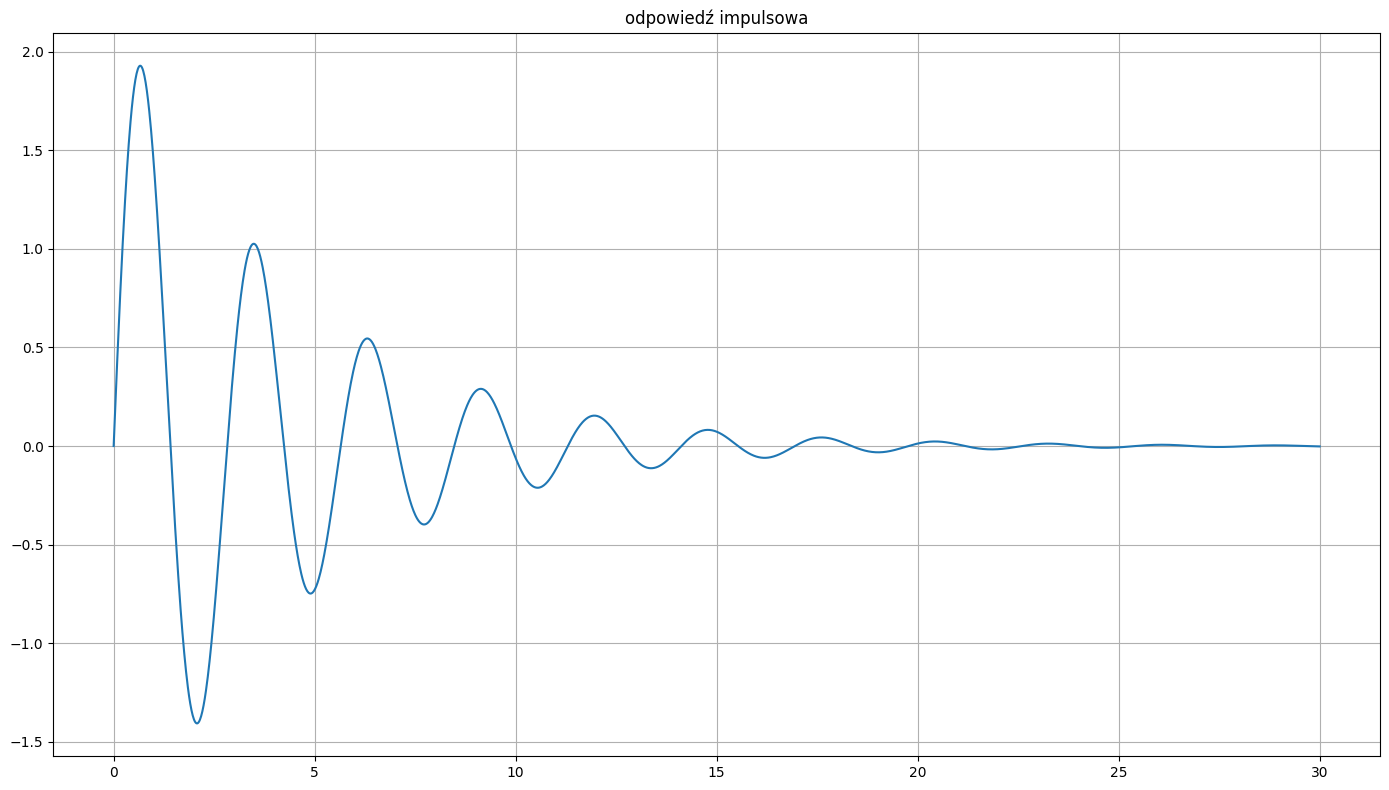

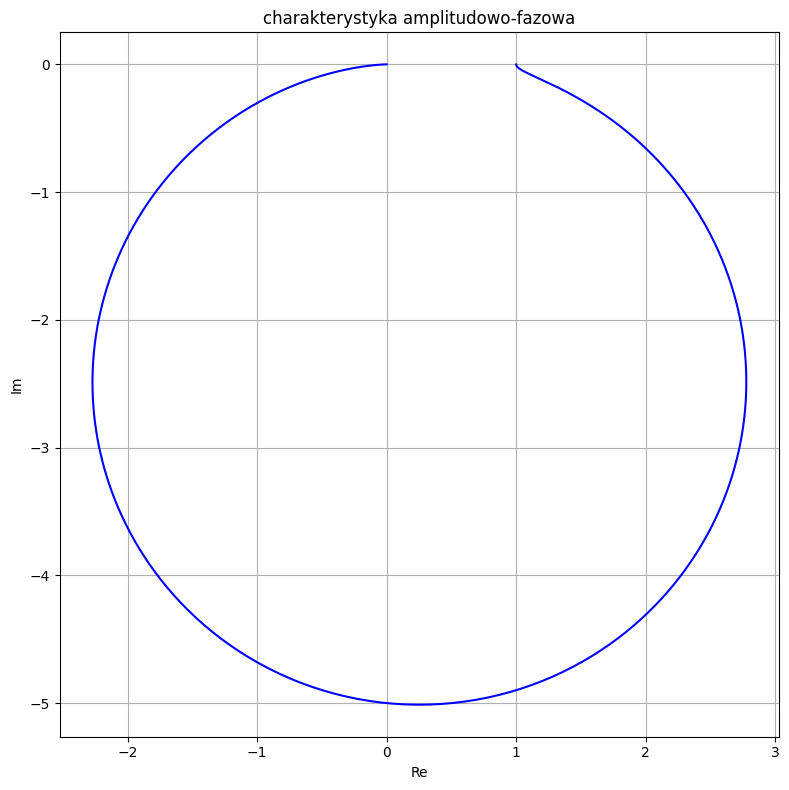

In [9]:
L=1
C=0.2
ξ=0.1

#transmitancja
ω0 = (1/np.sqrt(L*C))
B  = np.poly1d([           ω0**2])
A  = np.poly1d([1, 2*ξ*ω0, ω0**2])

#odpowiedź impulsowa
time    = np.linspace(0, 30, 2000)
impulse = calculateImpulseResponseFromNumDen(B, A, time)

figI, axI = plt.subplots(1, 1, figsize=default_figsize)
axI.plot(time, impulse)
axI.set_title("odpowiedź impulsowa")
axI.grid()
figI.tight_layout()  
figI.show()

#charakterystyka amplitudowo-fazowa
w = np.logspace(-2, 2, 10000)
s = w * 1j
H = B(s) / A(s)

figAF, axAF = plt.subplots(1, 1, figsize=poles_figsize)
axAF.plot(H.real, H.imag, "b")
axAF.set_title("charakterystyka amplitudowo-fazowa")
axAF.set_xlabel("Re")
axAF.set_ylabel("Im") 
axAF.grid()
figAF.tight_layout()  
figAF.show()

---- 
## 3. Analiza zmiany charakteru odpowiedzi impulsowej oraz zmiany położenia biegunów w funkcji zmiany wartości współczynnika tłumienia 
---- 

Na jednym wykresie zebrać odpowiedzi impulsowe dla przypadków: 

$\begin{align}
& \text {a)  }  0 < \xi < 1 \text { - drgan sinusoidalnych gasnacych} \\
& \text {b)  }  \xi = 0 \text { - drgan sinusoidalnych (generator)} \\
& \text {c)  }  \xi = 1 \text { - przypadku aperiodyczo-krytycznego} \\
& \text {d)  }  \xi > 1 \text { - przypadku przetlumionego}
 \end{align}$

Do odpowiedniej wartości $ \xi $ dopasuj wartości elementów R, L i C. Zalężność na $ \xi $ jest następująca:

$$ 2 \xi = R \sqrt {C \over L} $$

Na drugim wykresie zbierz położenia biegunów dla tych samych przypadków a)-d). Na podstawie otrzymanych wyników wyciągnąć wnioski na temat wpływu położenia biegunów transmitancji układu na jego odpowiedź impulsową? Dla każdego z przypadków odpowiedz czy odpowiedź jest stabilna w sensie BIBO?


c:\Users\Jan\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Jan\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Jan\AppData\Local\Temp\ipykernel_4664\968818838.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figI.show()
C:\Users\Jan\AppData\Local\Temp\ipykernel_4664\968818838.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figP.show()


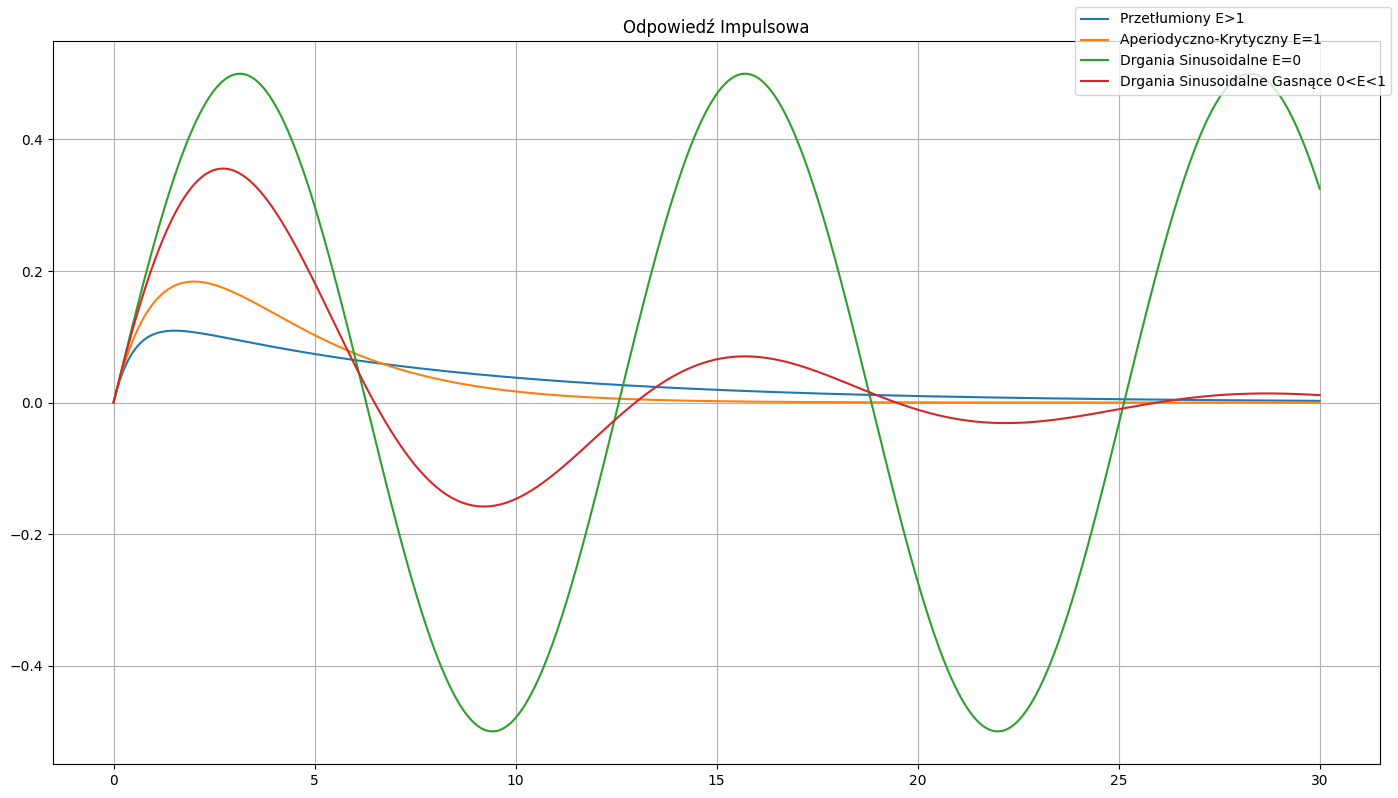

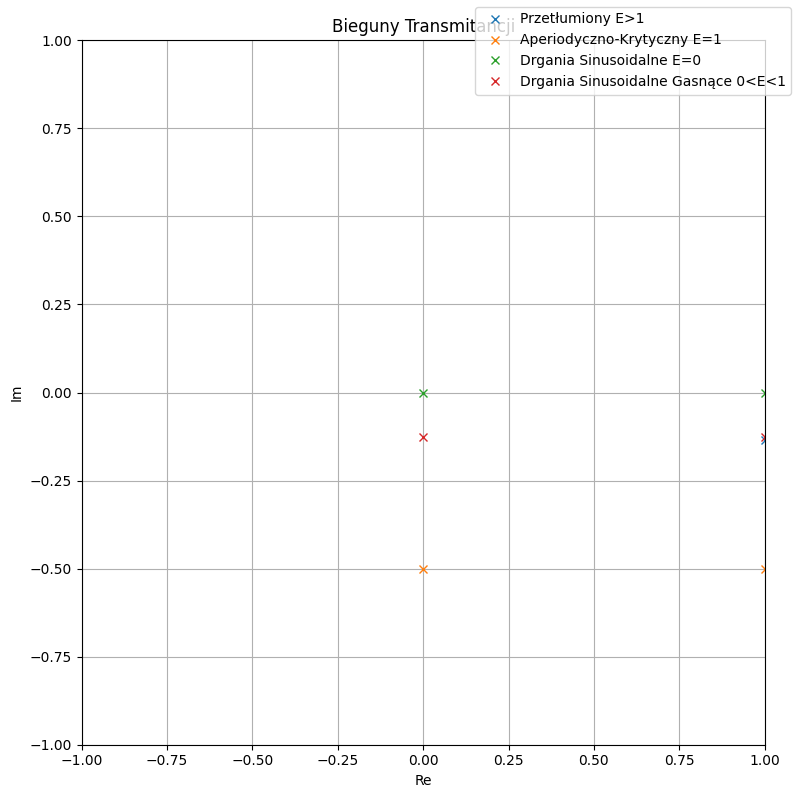

In [10]:
time = np.linspace(0, 30, 2000)    

Systems = {"Przetłumiony E>1": { "R" : 8  , "L" : 4, "C" : 1 },
"Aperiodyczno-Krytyczny E=1": { "R" : 4  , "L" : 4, "C" : 1 },
"Drgania Sinusoidalne E=0": { "R" : 0  , "L" : 4, "C" : 1 },
"Drgania Sinusoidalne Gasnące 0<E<1": { "R" : 1  , "L" : 4, "C" : 1 }}

figI, axI = plt.subplots(1, 1, figsize=default_figsize)
figP, axP = plt.subplots(1, 1, figsize=poles_figsize  )


for Name, Params in Systems.items():
    R, L, C = Params["R"], Params["L"], Params["C"]
    
    B = np.poly1d([1])
    A = np.poly1d([L*C, R*C, 1])

    impulse = calculateImpulseResponseFromNumDen(B, A, time)
    poles = np.roots(A)

    #plot impulse on axI
    axI.plot(time, impulse, label=Name)
    #plor poles on axP
    axP.plot(poles, "x", label=Name)

axI.set_title("Odpowiedź Impulsowa")
axI.grid()
figI.tight_layout() 
figI.legend()
figI.show()

axP.set_title("Bieguny Transmitancji")
axP.set_xlabel("Re")
axP.set_ylabel("Im") 
axP.set_xlim([-1, 1])
axP.set_ylim([-1, 1])
axP.grid()
figP.tight_layout() 
figP.legend()
figP.show()

---- 
## 4. Analiza przypadku nierzeczywistego
---- 

Sprawdzić jak będzie wyglądała odpowiedź impulsowa dla ujemnej wartości rezystancji np. R=-1. Wartości L i C przyjąć jednostkowe. Czy odpowiedź impulsowa jest sumowalna? Czy układ jest stabilny BIBO? Wyjaśnić czym charakteryzuje się brak możliwości posumowania odpowiedzi impulsowej.

---- 
## 5. Obejrzeć trójwymiarowy wykres transmitancji w funkcji zmiennej "s" dla przypadku drgań sinusoidalnych gasnących
---- 

Zmieniając wartość rezystora R, sprawdzić zmianę położenia biegunów oraz kształ transmitancji.



In [11]:
C, L, R = 1, 1, 1

B = np.poly1d([          1])
A = np.poly1d([C*L, C*R, 1])

Re     = np.linspace(-6, 6, 100)
Im     = np.linspace(-6, 6, 100)
RE, IM = np.meshgrid(Re, Im) #2D planes
s      = RE + IM*1j
H      = B(s)/A(s)
M      = np.abs(H)

fig = plt.figure(figsize=(16, 12))
ax  = fig.gca(projection='3d')
srf = ax.plot_surface(RE, IM, np.log(M), cmap='Spectral', cstride=1, rstride=1)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_zlabel("log(|H(jω)|)")
ax.set_title('Transmitancja 3D')
ax.view_init(45, 45)
fig.colorbar(srf) # add a color bar which maps values to colors
fig.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1600x1200 with 0 Axes>